# [My Github](https://github.com/SanjeevKurJha/Natural-Language-Processing)

In [6]:
#Importing the library 
import numpy as np
import pandas as  pd
import nltk
import time
import collections
nltk.download('punkt')
import re
import matplotlib.pyplot as plt
nltk.download('inaugural')
from nltk.tokenize import word_tokenize,sent_tokenize 
import urllib.request
nltk.download('stopwords')
from nltk.corpus import stopwords
from ast import literal_eval
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from textblob.classifiers import NaiveBayesClassifier
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
nltk.download('averaged_perceptron_tagger')
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sanjeev\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Sanjeev\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sanjeev\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sanjeev\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sanjeev\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

# Build word frequency model based on all reviews

# Importing the data

In [7]:
def read_data(filename):
    data = pd.read_csv(filename, sep=',')
    return data

In [8]:
data_set = read_data('Classification.csv')

In [9]:
selected_col=["reviews_list","sentiment"]

# Exploratory data analysis

In [10]:
data_set.head()

,name,reviews_list,aspects,sentiment
0,Dodda Mane Donne Biryani,Not a very big and fancy outlet,ambience,neutral
1,Dodda Mane Donne Biryani,A small store with seatings,ambience,neutral
2,Dodda Mane Donne Biryani,The piece was excellent but the rice was bland',price,positive
3,Golden Restaurant,The ambience is pretty decent and it's all ver...,ambience,positive
4,Golden Restaurant,Service is prompt too,service,positive


In [11]:
data_set.tail()

,name,reviews_list,aspects,sentiment
1391,Beijing Bites,I also had the chili chicken which was well p...,food,positive
1392,Beijing Bites,Yes I like their Chinese dishes,food,positive
1393,Beijing Bites,They are really super and awesome quantity,food,positive
1394,Beijing Bites,Please keep serve like this,service,positive
1395,Beijing Bites,The dragon chicken here is just YUM!,food,positive


In [12]:
print(data_set.describe())

                        name     reviews_list aspects sentiment
count                   1396             1396    1396      1396
unique                    33             1362       4         3
top     Melange - Hotel Ekaa  Value for money    food  positive
freq                     106                5     780       811


In [13]:
print(data_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 4 columns):
name            1396 non-null object
reviews_list    1396 non-null object
aspects         1396 non-null object
sentiment       1396 non-null object
dtypes: object(4)
memory usage: 43.7+ KB
None


In [14]:
#data_set=data_set[selected_col]

In [15]:
data_reviews=data_set['reviews_list'].astype(str)


# Data Preprocessing

In [16]:
def clean_text(text):
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"you'r", "you are", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r" \'m", " am", text)  
    text = re.sub(r"\'d", "would", text)
    text = re.sub(r"they'r", "they are", text)
    text = re.sub(r"\'ve", "have", text)
    text = re.sub(r"this's", "this is", text)
    text = re.sub(r"'what's", "what is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"who's", "who is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"there's", "there is", text)
    text = re.sub(r"\'re", "are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"  ", " ", text)
    text = re.sub(r'"' , "", text)
    text = re.sub(r"'" , "", text)
    text = re.sub(r"[0-9]+" , "", text)
    text = re.sub(r"\t" , "", text)
    text = re.sub(r"<b>" , "", text)
    text = re.sub(r"<i>" , "", text)
    text = re.sub(r"<" , "", text)
    text = re.sub(r">" , "", text)  
    text = re.sub(r"[~`!@#$%^&*_=():;/?_+|,.-]","",text)
    return text

In [17]:
stop_words = set(stopwords.words('english'))
def text_prepare(text):
    word_text=""
    text = text.lower()
    for word in text.split(" "): 
        if word.startswith("https://") or word.startswith("http://"):
            word=" " 
        elif word.startswith("@"):
            word=" " 
        else:
            if word not in stop_words:
                word=clean_text(word)
                word_text=word_text+" "+word
    return word_text

In [18]:
cleaned_reviews = ""
cleaned_text = ""
cleaned_sent = ""
for data_review in data_reviews:
    cleaned_text=text_prepare(data_review)
    cleaned_sent=cleaned_sent + cleaned_text
    cleaned_reviews=cleaned_reviews + cleaned_text +"."
    

In [19]:
cleaned_sent

' big fancy outlet  small store seatings  piece excellent rice bland ambience pretty decent clean  service prompt  coming menu shoked chicken biriyani available   ordered biriyani expectations considering price  huge portion pricing rice really good well cooked also  big pieces chicken  really struggled merely able finish whole biriyani dont ever order restaurantthey cheaters different pricing online order dinein owner abusive service also bad highly recomended chicken finely grilled tasted awesome though would suggest bit spicy chicken soft well cooked would suggest send hot online orders ordered restaurant send meal thali packing worst curd dal eat white rice  time eat without dal where get dal curd guys made night bad night   ordered one jumbo shawarmarate normal packing mark  anyway nice option shawarma lovers midnight king restaurant hsr bangalore order kerala paratha awesome test order chef special chicken gravey excellent every thing good quentity chicken less  awesome food hosp

In [20]:
cleaned_reviews


' big fancy outlet.  small store seatings.  piece excellent rice bland. ambience pretty decent clean.  service prompt.  coming menu shoked chicken biriyani available .  ordered biriyani expectations considering price.  huge portion pricing rice really good well cooked also  big pieces chicken.  really struggled merely able finish whole biriyani. dont ever order restaurantthey cheaters different pricing online order dinein. owner abusive service also bad highly recomended. chicken finely grilled tasted awesome. though would suggest bit spicy. chicken soft well cooked. would suggest send hot online orders. ordered restaurant send meal thali packing worst curd dal eat white rice  time eat without dal where get dal curd guys made night bad night   ordered one jumbo shawarmarate normal packing mark.  anyway nice option shawarma lovers. midnight king restaurant hsr bangalore. order kerala paratha awesome test. order chef special chicken gravey excellent. every thing good quentity chicken les

# Tokenize the data

In [21]:
word_tokens = nltk.word_tokenize(cleaned_sent)
print(word_tokens)

['big', 'fancy', 'outlet', 'small', 'store', 'seatings', 'piece', 'excellent', 'rice', 'bland', 'ambience', 'pretty', 'decent', 'clean', 'service', 'prompt', 'coming', 'menu', 'shoked', 'chicken', 'biriyani', 'available', 'ordered', 'biriyani', 'expectations', 'considering', 'price', 'huge', 'portion', 'pricing', 'rice', 'really', 'good', 'well', 'cooked', 'also', 'big', 'pieces', 'chicken', 'really', 'struggled', 'merely', 'able', 'finish', 'whole', 'biriyani', 'dont', 'ever', 'order', 'restaurantthey', 'cheaters', 'different', 'pricing', 'online', 'order', 'dinein', 'owner', 'abusive', 'service', 'also', 'bad', 'highly', 'recomended', 'chicken', 'finely', 'grilled', 'tasted', 'awesome', 'though', 'would', 'suggest', 'bit', 'spicy', 'chicken', 'soft', 'well', 'cooked', 'would', 'suggest', 'send', 'hot', 'online', 'orders', 'ordered', 'restaurant', 'send', 'meal', 'thali', 'packing', 'worst', 'curd', 'dal', 'eat', 'white', 'rice', 'time', 'eat', 'without', 'dal', 'where', 'get', 'dal',

# Count each word in sentances 

In [22]:
words_counts = {}
for word in word_tokens:
    if word in words_counts:
        words_counts[word] = words_counts[word] + 1
    else:
        words_counts[word] = 1 
print(words_counts)

{'big': 12, 'fancy': 3, 'outlet': 4, 'small': 8, 'store': 1, 'seatings': 1, 'piece': 3, 'excellent': 19, 'rice': 35, 'bland': 5, 'ambience': 87, 'pretty': 14, 'decent': 23, 'clean': 4, 'service': 147, 'prompt': 4, 'coming': 3, 'menu': 16, 'shoked': 1, 'chicken': 138, 'biriyani': 14, 'available': 7, 'ordered': 60, 'expectations': 4, 'considering': 3, 'price': 14, 'huge': 10, 'portion': 5, 'pricing': 9, 'really': 74, 'good': 278, 'well': 34, 'cooked': 12, 'also': 65, 'pieces': 5, 'struggled': 1, 'merely': 1, 'able': 1, 'finish': 2, 'whole': 6, 'dont': 4, 'ever': 13, 'order': 30, 'restaurantthey': 1, 'cheaters': 1, 'different': 8, 'online': 2, 'dinein': 1, 'owner': 1, 'abusive': 1, 'bad': 22, 'highly': 4, 'recomended': 1, 'finely': 1, 'grilled': 7, 'tasted': 16, 'awesome': 37, 'though': 15, 'would': 35, 'suggest': 6, 'bit': 18, 'spicy': 20, 'soft': 10, 'send': 5, 'hot': 9, 'orders': 1, 'restaurant': 57, 'meal': 12, 'thali': 12, 'packing': 7, 'worst': 18, 'curd': 6, 'dal': 16, 'eat': 14, '

# Find most common 20 words

In [23]:
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:20]
print(most_common_words)

[('food', 307), ('good', 278), ('place', 153), ('service', 147), ('chicken', 138), ('ambience', 87), ('really', 74), ('taste', 72), ('great', 72), ('time', 66), ('also', 65), ('ordered', 60), ('staff', 60), ('restaurant', 57), ('one', 53), ('best', 52), ('quality', 51), ('try', 44), ('experience', 43), ('like', 40)]


# Frequency distributions

<FreqDist with 2122 samples and 8308 outcomes>
[('food', 307), ('good', 278), ('place', 153), ('service', 147), ('chicken', 138), ('ambience', 87), ('really', 74), ('taste', 72), ('great', 72), ('time', 66), ('also', 65), ('ordered', 60), ('staff', 60), ('restaurant', 57), ('one', 53), ('best', 52), ('quality', 51), ('try', 44), ('experience', 43), ('like', 40), ('tasty', 40), ('nice', 39), ('starters', 39), ('awesome', 37), ('delicious', 37)]


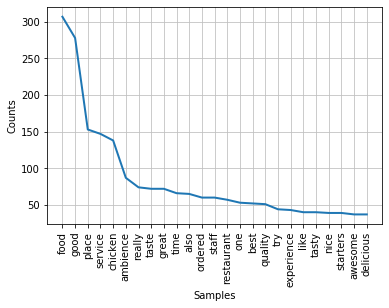

In [24]:
import operator
%matplotlib inline
Freq_dist_nltk=nltk.FreqDist(word_tokens)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

# Building the wordcloud


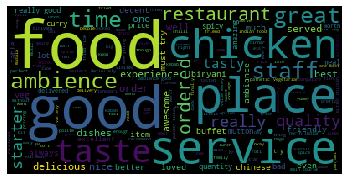

In [25]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(cleaned_sent)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Build word frequency model for  reviews group by sentiment

In [26]:
Clean_sent_arr=[]
for cleaned_review in cleaned_reviews.split("."):
    Clean_sent_arr.append(cleaned_review)

In [27]:
df = pd.DataFrame(Clean_sent_arr,columns =['reviews_list']) 

In [28]:
df_col_merge =pd.concat([df, data_set['sentiment']], axis=1)

In [29]:
dataset = df_col_merge.dropna(how='any',axis=0)

# Exploratory Data Analysis 

In [30]:
dataset.head()

,reviews_list,sentiment
0,big fancy outlet,neutral
1,small store seatings,neutral
2,piece excellent rice bland,positive
3,ambience pretty decent clean,positive
4,service prompt,positive


In [31]:
dataset.tail()

,reviews_list,sentiment
1391,also chili chicken well prepared,positive
1392,yes like chinese dishes,positive
1393,really super awesome quantity,positive
1394,please keep serve like,positive
1395,dragon chicken yum,positive


In [32]:
dataset.describe()

,reviews_list,sentiment
count,1396,1396
unique,1332,3
top,food,positive
freq,10,811


In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1396 entries, 0 to 1395
Data columns (total 2 columns):
reviews_list    1396 non-null object
sentiment       1396 non-null object
dtypes: object(2)
memory usage: 32.7+ KB


# Filter Negative dataset and build word frequency 

In [34]:
dataset_Negative=dataset[dataset['sentiment'] == "negative"]

In [35]:
dataset_Negative=dataset_Negative['reviews_list']

In [36]:
type(dataset_Negative)

pandas.core.series.Series

In [37]:
cleaned_text = ""
cleaned_sent = ""
for dataset_review in dataset_Negative:
    cleaned_text=text_prepare(dataset_review)
    cleaned_sent=cleaned_sent + cleaned_text
    

# Tokenize the data

In [38]:
word_tokens = nltk.word_tokenize(cleaned_sent)


In [39]:
words_counts = {}
for word in word_tokens:
    if word in words_counts:
        words_counts[word] = words_counts[word] + 1
    else:
        words_counts[word] = 1 

In [40]:
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:20]


<FreqDist with 955 samples and 2260 outcomes>
[('food', 64), ('service', 40), ('chicken', 37), ('good', 28), ('ordered', 26), ('place', 26), ('time', 24), ('bad', 21), ('taste', 19), ('worst', 18), ('even', 18), ('delivery', 18), ('order', 17), ('quality', 17), ('one', 15), ('ambience', 15), ('restaurant', 14), ('experience', 14), ('great', 14), ('would', 13), ('table', 13), ('staff', 13), ('like', 12), ('late', 12), ('never', 12)]


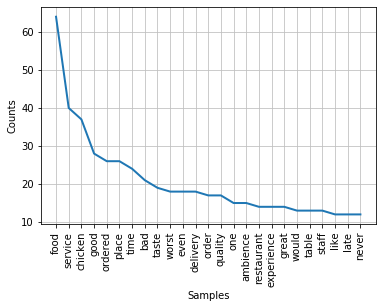

In [41]:
Freq_dist_nltk=nltk.FreqDist(word_tokens)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

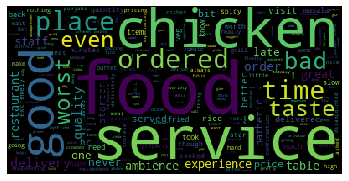

In [42]:
wordcloud = WordCloud().generate(cleaned_sent)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Filter Posative dataset and build word frequency

In [43]:
dataset_Positive=dataset[dataset['sentiment'] == "positive"]

In [44]:
dataset_Positive=dataset_Positive['reviews_list']

In [45]:
#Strip the records and create a word list for each tweet
word_list = []
for record in (dataset_Positive):
    #print(record)
    words = []
    tokens = record.split()
    #print(tokens)
    for token in tokens:
        words.append(token.lower())
    word_list.append(words)

In [46]:
cleaned_text = ""
cleaned_sent = ""
for dataset_review in dataset_Positive:
    cleaned_text=text_prepare(dataset_review)
    cleaned_sent=cleaned_sent + cleaned_text

In [47]:
word_tokens = nltk.word_tokenize(cleaned_sent)

In [48]:
words_counts = {}
for word in word_tokens:
    if word in words_counts:
        words_counts[word] = words_counts[word] + 1
    else:
        words_counts[word] = 1 

In [49]:
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:20]

<FreqDist with 1420 samples and 4776 outcomes>
[('good', 217), ('food', 199), ('place', 108), ('service', 89), ('chicken', 85), ('really', 60), ('ambience', 58), ('also', 46), ('great', 46), ('best', 45), ('taste', 45), ('staff', 39), ('time', 37), ('tasty', 36), ('awesome', 35), ('restaurant', 33), ('one', 32), ('try', 30), ('ordered', 29), ('quality', 29), ('delicious', 28), ('must', 27), ('nice', 26), ('indian', 26), ('loved', 26)]


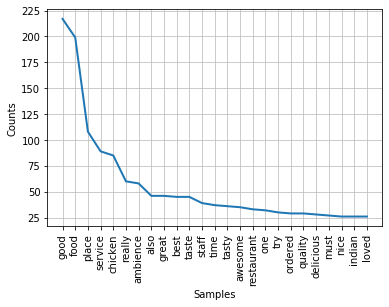

In [50]:
Freq_dist_nltk=nltk.FreqDist(word_tokens)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

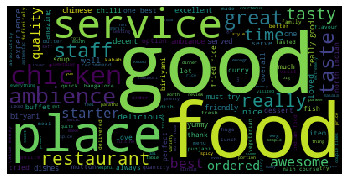

In [51]:
wordcloud = WordCloud().generate(cleaned_sent)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Filter Neutral dataset and build word frequency

In [52]:

dataset_Neutral=dataset[dataset['sentiment'] == "neutral"]
dataset_Neutral=dataset_Neutral['reviews_list']
cleaned_text = ""
cleaned_sent = ""
for dataset_Tweet in dataset_Neutral:
    cleaned_text=text_prepare(dataset_Tweet)
    cleaned_sent=cleaned_sent + cleaned_text
word_tokens = nltk.word_tokenize(cleaned_sent)
words_counts = {}
for word in word_tokens:
    if word in words_counts:
        words_counts[word] = words_counts[word] + 1
    else:
        words_counts[word] = 1 
        

<FreqDist with 611 samples and 1215 outcomes>
[('food', 44), ('good', 33), ('place', 19), ('service', 18), ('chicken', 16), ('veg', 14), ('ambience', 14), ('great', 12), ('try', 12), ('restaurant', 10), ('went', 9), ('taste', 8), ('really', 8), ('also', 8), ('thali', 8), ('staff', 8), ('nice', 8), ('must', 8), ('like', 7), ('best', 7), ('non', 7), ('delicious', 7), ('dishes', 7), ('buffet', 7), ('items', 6)]


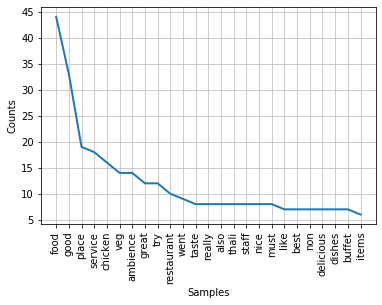

In [53]:
Freq_dist_nltk=nltk.FreqDist(word_tokens)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

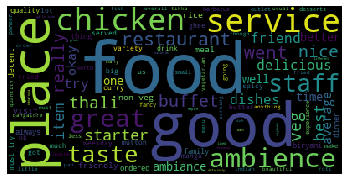

In [54]:
wordcloud = WordCloud().generate(cleaned_sent)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Build a model using KMeans 

In [55]:
#Text clustering with K-means
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [56]:
df=df.iloc[:,0]

In [57]:
vectorizer = TfidfVectorizer(stop_words='english')

In [58]:
X = vectorizer.fit_transform(df)
print(X)

  (0, 150)	0.5114326561626965
  (0, 587)	0.6176000976754962
  (0, 1192)	0.5975004247375784
  (1, 1581)	0.4999447812890454
  (1, 1657)	0.6123949769804813
  (1, 1516)	0.6123949769804813
  (2, 1260)	0.5798878793857352
  (2, 559)	0.4526807330314376
  (2, 1452)	0.40141687783315483
  (2, 163)	0.5455957216422408
  (3, 47)	0.3528857023174301
  (3, 1323)	0.5171274350600428
  (3, 430)	0.4732136410657473
  (3, 297)	0.6197739482403674
  (4, 1536)	0.4432387177040457
  (4, 1336)	0.8964036139641971
  (5, 323)	0.4683579431260151
  (5, 1055)	0.36952097868453476
  (5, 1549)	0.515705834781073
  (5, 265)	0.24073982312902245
  (5, 152)	0.3780706938070942
  (5, 96)	0.4210100514709572
  (6, 152)	0.42495927376175047
  (6, 1182)	0.31980971078403697
  (6, 564)	0.5093109919996776
  :	:
  (1389, 598)	0.5184696302189878
  (1390, 265)	0.22255347798085184
  (1390, 1622)	0.33134325219524
  (1390, 1735)	0.28757218920311417
  (1390, 1400)	0.43297651309974156
  (1390, 1812)	0.3379965891734213
  (1390, 673)	0.36360101964

**Build the clusters**

In [59]:
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

**Profile the clusters: Top terms per cluster**

In [60]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),

Cluster 0:
 place
 chicken
 ambience
 staff
 time
 great
 best
 really
 ordered
 experience
Cluster 1:
 service
 good
 quick
 great
 friendly
 pathetic
 food
 slow
 staff
 really
Cluster 2:
 food
 great
 tasty
 quality
 awesome
 taste
 loved
 authentic
 place
 indian
Cluster 3:
 good
 food
 ambience
 really
 quality
 place
 taste
 chicken
 rice
 time


In [61]:
#Use model for prediction
print("\n")
print("Prediction")
Y = vectorizer.transform(["behavior"])
prediction = model.predict(Y)
print(prediction)



Prediction
[0]


# Build a model using Naiv Bayesian

In [62]:
dataset_list_train = dataset[0:943].values.tolist()
dataset_list_test = dataset[943:1048].values.tolist()


In [63]:
modelnbs=NaiveBayesClassifier(dataset_list_train)

**Model Accuracy on trainig set**

In [64]:
print(modelnbs.accuracy(dataset_list_train))

0.8642629904559915


**Model Accuracy on test set**

In [65]:
print(modelnbs.accuracy(dataset_list_test))

0.6761904761904762


In [66]:
modelnbs.show_informative_features(5)

Most Informative Features
           contains(bad) = True           negati : positi =     22.5 : 1.0
          contains(went) = True           neutra : positi =     21.9 : 1.0
         contains(never) = True           negati : positi =     13.0 : 1.0
       contains(average) = True           neutra : positi =     11.1 : 1.0
          contains(even) = True           negati : positi =      8.6 : 1.0


In [67]:
prob_dist = modelnbs.prob_classify("While my hubby and friend enjoyed their scrumptious meals, I just stick to my noodles which was OK for me would have loved some red chili sauce but unfortunately they did not have")

In [68]:
prob_dist.max()

'neutral'

**Probability distribution**

In [69]:
round(prob_dist.prob("positive"), 2)

0.0

In [70]:
round(prob_dist.prob("neutral"), 2)

0.98

In [71]:
round(prob_dist.prob("negative"), 2)

0.02

# Build Lexican Based Model

**Sentence Tokenization**

In [72]:
tokenized_text=sent_tokenize(cleaned_reviews)


**Word Tokenization**

In [73]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(cleaned_reviews)

**Frequency Distribution**

In [74]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)


In [75]:
fdist.most_common(2)

[('.', 1388), ('food', 307)]

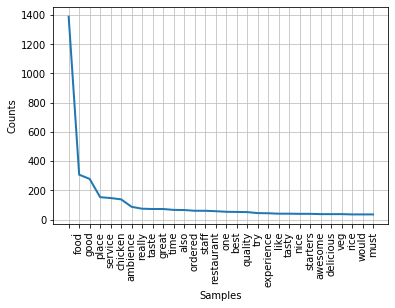

In [76]:
fdist.plot(30,cumulative=False)
plt.show()

**Removing Stopwords**

In [77]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{'didn', 'where', 'haven', "needn't", 'here', 'is', 'ain', 'you', "you're", 'these', 'which', 'on', 'more', 'needn', 'hers', 'was', 'a', "aren't", 'until', 'yourselves', 'his', 'doing', 'no', 'ourselves', 'weren', 'are', 'down', "hasn't", 'and', 'the', 'me', 'itself', "weren't", 'ma', 'only', 'will', 'they', 'of', 'both', 'then', 'isn', 'now', 'while', 'just', 'o', 'if', 'most', "you've", 'aren', 'before', 'whom', 'shouldn', 'an', "she's", 'such', 'their', 're', 'too', 'doesn', 'few', 'again', 'this', 'other', "haven't", 'it', 'nor', 'there', "you'll", "couldn't", 'your', 'for', 'because', 'been', 'each', 'be', 'being', 'further', "isn't", 'than', "don't", 'hadn', "mightn't", 'shan', 'to', 'were', "should've", "it's", 'its', 'through', 'when', "won't", 's', 'i', 'into', "mustn't", 'do', "doesn't", "you'd", 'has', 'out', 'up', 'from', 'all', 'having', 'ours', 'mightn', "shouldn't", 'as', 'won', 't', 'hasn', 'during', 'theirs', 'or', 'about', 'wouldn', "hadn't", "didn't", 'over', 'm', 'v

In [78]:
filtered_sent=[]
for w in tokenized_text:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_text)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: [' big fancy outlet.', 'small store seatings.', 'piece excellent rice bland.', 'ambience pretty decent clean.', 'service prompt.', 'coming menu shoked chicken biriyani available .', 'ordered biriyani expectations considering price.', 'huge portion pricing rice really good well cooked also  big pieces chicken.', 'really struggled merely able finish whole biriyani.', 'dont ever order restaurantthey cheaters different pricing online order dinein.', 'owner abusive service also bad highly recomended.', 'chicken finely grilled tasted awesome.', 'though would suggest bit spicy.', 'chicken soft well cooked.', 'would suggest send hot online orders.', 'ordered restaurant send meal thali packing worst curd dal eat white rice  time eat without dal where get dal curd guys made night bad night   ordered one jumbo shawarmarate normal packing mark.', 'anyway nice option shawarma lovers.', 'midnight king restaurant hsr bangalore.', 'order kerala paratha awesome test.', 'order chef s

# Lexicon Normalization

**Stemming**

In [79]:
ps = PorterStemmer()
stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: [' big fancy outlet.', 'small store seatings.', 'piece excellent rice bland.', 'ambience pretty decent clean.', 'service prompt.', 'coming menu shoked chicken biriyani available .', 'ordered biriyani expectations considering price.', 'huge portion pricing rice really good well cooked also  big pieces chicken.', 'really struggled merely able finish whole biriyani.', 'dont ever order restaurantthey cheaters different pricing online order dinein.', 'owner abusive service also bad highly recomended.', 'chicken finely grilled tasted awesome.', 'though would suggest bit spicy.', 'chicken soft well cooked.', 'would suggest send hot online orders.', 'ordered restaurant send meal thali packing worst curd dal eat white rice  time eat without dal where get dal curd guys made night bad night   ordered one jumbo shawarmarate normal packing mark.', 'anyway nice option shawarma lovers.', 'midnight king restaurant hsr bangalore.', 'order kerala paratha awesome test.', 'order chef sp

**Lemmatization**

**Lexicon Normalization
performing stemming and Lemmatization**

In [80]:
lem = WordNetLemmatizer()
stem  = PorterStemmer()
lem_words=[]
for w in tokenized_word:
    lem_words.append(lem.lemmatize(w))
print("Lemmatized Word:",lem_words)


Lemmatized Word: ['big', 'fancy', 'outlet', '.', 'small', 'store', 'seating', '.', 'piece', 'excellent', 'rice', 'bland', '.', 'ambience', 'pretty', 'decent', 'clean', '.', 'service', 'prompt', '.', 'coming', 'menu', 'shoked', 'chicken', 'biriyani', 'available', '.', 'ordered', 'biriyani', 'expectation', 'considering', 'price', '.', 'huge', 'portion', 'pricing', 'rice', 'really', 'good', 'well', 'cooked', 'also', 'big', 'piece', 'chicken', '.', 'really', 'struggled', 'merely', 'able', 'finish', 'whole', 'biriyani', '.', 'dont', 'ever', 'order', 'restaurantthey', 'cheater', 'different', 'pricing', 'online', 'order', 'dinein', '.', 'owner', 'abusive', 'service', 'also', 'bad', 'highly', 'recomended', '.', 'chicken', 'finely', 'grilled', 'tasted', 'awesome', '.', 'though', 'would', 'suggest', 'bit', 'spicy', '.', 'chicken', 'soft', 'well', 'cooked', '.', 'would', 'suggest', 'send', 'hot', 'online', 'order', '.', 'ordered', 'restaurant', 'send', 'meal', 'thali', 'packing', 'worst', 'curd',

**POS Tagging**

In [81]:
tokens=word_tokenize(cleaned_reviews)
print(tokens)

['big', 'fancy', 'outlet', '.', 'small', 'store', 'seatings', '.', 'piece', 'excellent', 'rice', 'bland', '.', 'ambience', 'pretty', 'decent', 'clean', '.', 'service', 'prompt', '.', 'coming', 'menu', 'shoked', 'chicken', 'biriyani', 'available', '.', 'ordered', 'biriyani', 'expectations', 'considering', 'price', '.', 'huge', 'portion', 'pricing', 'rice', 'really', 'good', 'well', 'cooked', 'also', 'big', 'pieces', 'chicken', '.', 'really', 'struggled', 'merely', 'able', 'finish', 'whole', 'biriyani', '.', 'dont', 'ever', 'order', 'restaurantthey', 'cheaters', 'different', 'pricing', 'online', 'order', 'dinein', '.', 'owner', 'abusive', 'service', 'also', 'bad', 'highly', 'recomended', '.', 'chicken', 'finely', 'grilled', 'tasted', 'awesome', '.', 'though', 'would', 'suggest', 'bit', 'spicy', '.', 'chicken', 'soft', 'well', 'cooked', '.', 'would', 'suggest', 'send', 'hot', 'online', 'orders', '.', 'ordered', 'restaurant', 'send', 'meal', 'thali', 'packing', 'worst', 'curd', 'dal', 'eat

In [82]:
nltk.pos_tag(tokens)

[('big', 'JJ'),
 ('fancy', 'JJ'),
 ('outlet', 'NN'),
 ('.', '.'),
 ('small', 'JJ'),
 ('store', 'NN'),
 ('seatings', 'NNS'),
 ('.', '.'),
 ('piece', 'NN'),
 ('excellent', 'JJ'),
 ('rice', 'NN'),
 ('bland', 'NN'),
 ('.', '.'),
 ('ambience', 'NN'),
 ('pretty', 'RB'),
 ('decent', 'JJ'),
 ('clean', 'NN'),
 ('.', '.'),
 ('service', 'NN'),
 ('prompt', 'NN'),
 ('.', '.'),
 ('coming', 'VBG'),
 ('menu', 'NN'),
 ('shoked', 'VBD'),
 ('chicken', 'JJ'),
 ('biriyani', 'NN'),
 ('available', 'JJ'),
 ('.', '.'),
 ('ordered', 'VBN'),
 ('biriyani', 'JJ'),
 ('expectations', 'NNS'),
 ('considering', 'VBG'),
 ('price', 'NN'),
 ('.', '.'),
 ('huge', 'JJ'),
 ('portion', 'NN'),
 ('pricing', 'NN'),
 ('rice', 'NN'),
 ('really', 'RB'),
 ('good', 'JJ'),
 ('well', 'NN'),
 ('cooked', 'NNS'),
 ('also', 'RB'),
 ('big', 'JJ'),
 ('pieces', 'NNS'),
 ('chicken', 'NN'),
 ('.', '.'),
 ('really', 'RB'),
 ('struggled', 'VBD'),
 ('merely', 'RB'),
 ('able', 'JJ'),
 ('finish', 'JJ'),
 ('whole', 'JJ'),
 ('biriyani', 'NN'),
 ('.', 

In [83]:
dataset.sentiment.value_counts()



positive    811
negative    361
neutral     224
Name: sentiment, dtype: int64

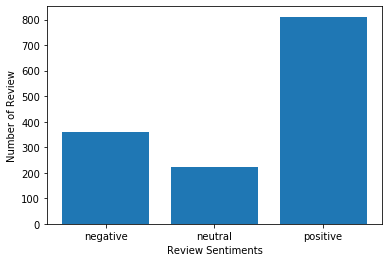

In [84]:
Sentiment_count=dataset.groupby('sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['reviews_list'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

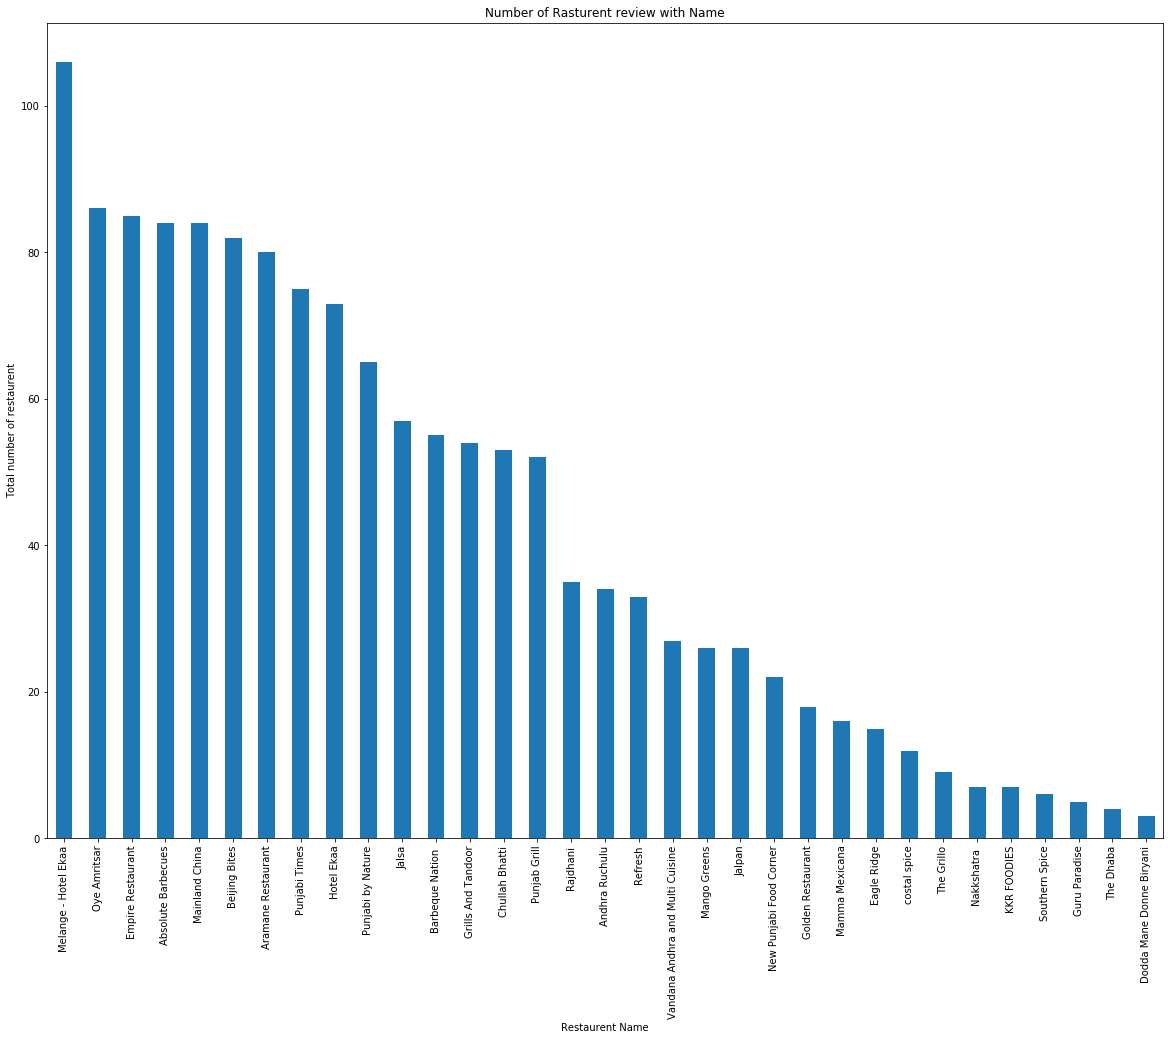

In [85]:
plt.figure(figsize=(20,15))
df_name=data_set.name.value_counts()
df_name.plot(kind="bar")
plt.xlabel("Restaurent Name")
plt.ylabel("Total number of restaurent")
plt.title("Number of Rasturent review with Name")
plt.show()

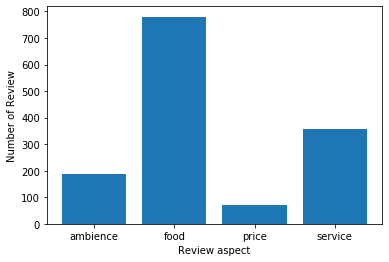

In [86]:
Sentiment_count=data_set.groupby('aspects').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['reviews_list'])
plt.xlabel('Review aspect')
plt.ylabel('Number of Review')
plt.show()

In [87]:
plt_size = plt.rcParams["figure.figsize"] 
plt_size[0] = 10
plt_size[1] = 8
plt.rcParams["figure.figsize"] = plt_size 

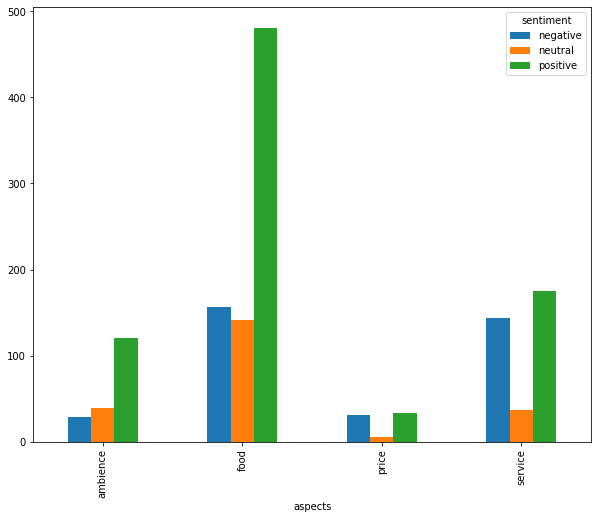

In [88]:
restaurant_sentiment = data_set.groupby(['aspects', 'sentiment']).sentiment.count().unstack()
restaurant_sentiment.plot(kind='bar')

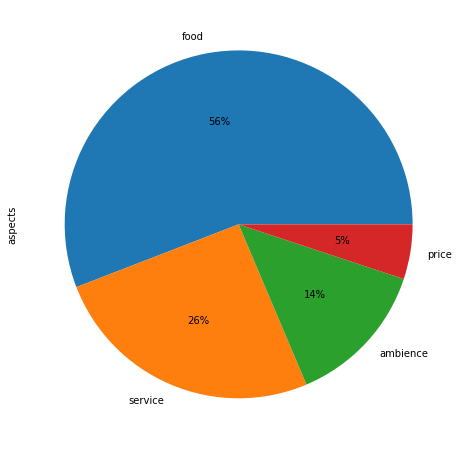

In [89]:
data_set.aspects.value_counts().plot(kind='pie', autopct='%1.0f%%')

**Tokenizer to remove unwanted elements from out data like symbols and numbers**

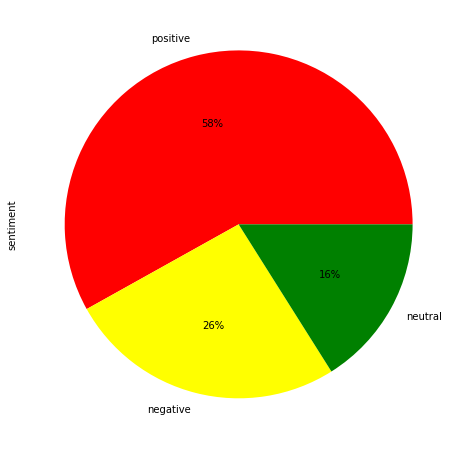

In [90]:
data_set.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [91]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cvect = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cvect.fit_transform(dataset['reviews_list'])

#####text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])

In [92]:
X_train, X_test, y_train, y_test = train_test_split(text_counts, dataset['sentiment'], test_size=0.25, random_state=1)

**Model Generation Using Multinomial Naive Bayes**

In [93]:
modelcvectMLB = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True).fit(X_train, y_train)
predictedcvectMLB= modelcvectMLB.predict(X_test)
print("MultinomialNB Accuracy count vector:",metrics.accuracy_score(y_test, predictedcvectMLB))

MultinomialNB Accuracy count vector: 0.6762177650429799


**TF-IDF Vectorizer**

In [94]:
tf=TfidfVectorizer()
text_tf= tf.fit_transform(dataset['sentiment'])

In [95]:
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, dataset['sentiment'], test_size=0.30, random_state=123)

**Model Generation Using Multinomial Naive Bayes**

In [96]:
modelTFIDFMLB = MultinomialNB().fit(X_train, y_train)
predictedTFIDFMLB= modelTFIDFMLB.predict(X_test)
print("MultinomialNB Accuracy with tf-idf:",metrics.accuracy_score(y_test, predictedTFIDFMLB))

MultinomialNB Accuracy with tf-idf: 1.0


#### Model Accuracy on Random forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model_rf = RandomForestClassifier(n_estimators=200, random_state=0)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [98]:
pred_rf = model_rf.predict(X_test)

In [99]:
print(confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))
print(accuracy_score(y_test, pred_rf))

[[136   0   0]
 [  0  56   0]
 [  0   0 227]]
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       136
     neutral       1.00      1.00      1.00        56
    positive       1.00      1.00      1.00       227

    accuracy                           1.00       419
   macro avg       1.00      1.00      1.00       419
weighted avg       1.00      1.00      1.00       419

1.0


#### Saving the Model

In [100]:
with open('restaurent_classifier', 'wb') as picklefile:
    pickle.dump(pred_rf,picklefile)

#### Loading the Model

In [108]:
with open('restaurent_classifier', 'rb') as rest_model:
    model = pickle.load(rest_model)

#### Getting accuracy on loaded model

In [109]:
print(confusion_matrix(y_test,model))
print(classification_report(y_test,model))
print(accuracy_score(y_test, model))

[[136   0   0]
 [  0  56   0]
 [  0   0 227]]
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       136
     neutral       1.00      1.00      1.00        56
    positive       1.00      1.00      1.00       227

    accuracy                           1.00       419
   macro avg       1.00      1.00      1.00       419
weighted avg       1.00      1.00      1.00       419

1.0


In [115]:
lex_file = read_data("AFINN-111.csv")

#Strip the records and create a word list for each restaurent
word_list = []
for record in (dataset['reviews_list']):
    words = []
    tokens = record.split()
    for token in tokens:
        words.append(token.lower())
    word_list.append(words)


In [116]:
lexicons = {}
records = lex_file.values.tolist()
#print(records)
for record in records:
    lexicons[record[0]] = int(record[1])

In [117]:
strength = []
notlexWord=[]
for words in word_list:
    score = 0
    for word in words:
        if word in lexicons:
            score = score + lexicons[word]
        else:
            notlexWord.append(word)  
    strength.append(score) 
senti_matrix = pd.DataFrame(strength, dataset)

In [118]:
notlexWord

['fancy',
 'outlet',
 'small',
 'store',
 'seatings',
 'piece',
 'rice',
 'bland',
 'ambience',
 'decent',
 'service',
 'prompt',
 'coming',
 'menu',
 'shoked',
 'chicken',
 'biriyani',
 'available',
 'ordered',
 'biriyani',
 'expectations',
 'considering',
 'price',
 'portion',
 'pricing',
 'rice',
 'really',
 'well',
 'cooked',
 'also',
 'pieces',
 'chicken',
 'really',
 'merely',
 'able',
 'finish',
 'whole',
 'biriyani',
 'dont',
 'ever',
 'order',
 'restaurantthey',
 'different',
 'pricing',
 'online',
 'order',
 'dinein',
 'owner',
 'service',
 'also',
 'highly',
 'recomended',
 'chicken',
 'finely',
 'grilled',
 'tasted',
 'though',
 'would',
 'suggest',
 'bit',
 'spicy',
 'chicken',
 'soft',
 'well',
 'cooked',
 'would',
 'suggest',
 'send',
 'hot',
 'online',
 'orders',
 'ordered',
 'restaurant',
 'send',
 'meal',
 'thali',
 'packing',
 'curd',
 'dal',
 'eat',
 'white',
 'rice',
 'time',
 'eat',
 'without',
 'dal',
 'where',
 'get',
 'dal',
 'curd',
 'guys',
 'made',
 'night',

In [113]:
senti_matrix[0:20]

,0
"( big fancy outlet, neutral)",0
"( small store seatings, neutral)",0
"( piece excellent rice bland, positive)",2
"( ambience pretty decent clean, positive)",2
"( service prompt, positive)",2
"( coming menu shoked chicken biriyani available , positive)",2
"( ordered biriyani expectations considering price, positive)",2
"( huge portion pricing rice really good well cooked also big pieces chicken, positive)",2
"( really struggled merely able finish whole biriyani, positive)",2
"( dont ever order restaurantthey cheaters different pricing online order dinein, negative)",-2


In [103]:
col=["senti"]

In [104]:
senti_matrix.columns=col

In [105]:
senti_matrix

,senti
"( big fancy outlet, neutral)",0
"( small store seatings, neutral)",0
"( piece excellent rice bland, positive)",2
"( ambience pretty decent clean, positive)",2
"( service prompt, positive)",2
"( coming menu shoked chicken biriyani available , positive)",2
"( ordered biriyani expectations considering price, positive)",2
"( huge portion pricing rice really good well cooked also big pieces chicken, positive)",2
"( really struggled merely able finish whole biriyani, positive)",2
"( dont ever order restaurantthey cheaters different pricing online order dinein, negative)",-2


In [106]:
from affine import Affine
